In [135]:
from pandas import DataFrame, concat
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn import preprocessing

import pandas as pd


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


dataset = pd.read_csv("../../customers/arrebo/dataset_hinge.csv", index_col=0, header=0)
for index, row in dataset.iterrows():
    if "Dispositivo di emergenza inserito (GE0E16)" in row[4]:
        dataset.drop(index, axis=0, inplace=True)
dataset["ST_MACH_EMERG_DESC"] = preprocessing.LabelEncoder().fit_transform(dataset["ST_MACH_EMERG_DESC"])
dataset = dataset[[c for c in dataset if c not in ["ST_MACH_EMERG_DESC"]] + ["ST_MACH_EMERG_DESC"]]
dataset

,METRI_LAVORATI_PARZ,METRI_LAVORATI_TOT,NUM_PASSAGGI_PARZ,NUM_PASSAGGI_TOT,ST_MACH_FULL,ST_MACH_ON,ST_MACH_POT,ST_MACH_STANDBY,ST_MACH_WORK,TEMP_LAMPADA_IRL,TEMP_RULLO_EVA,TEMP_RULLO_PU,TEMP_VASCA_EVA,TEMP_VASCA_PU,VELOCITA_CG,ST_MACH_EMERG_DESC
TIME_STAMP,,,,,,,,,,,,,,,,
2022-06-29 10:18:33.783,0,3148,0,5182,0,1,1,1,0,28,69,69,70,70,0,4
2022-06-29 10:19:35.767,0,3148,0,5182,0,1,1,1,0,28,88,88,91,91,0,4
2022-06-29 10:20:37.537,0,3148,0,5182,0,1,1,1,0,28,105,105,109,109,0,0
2022-06-29 10:21:39.287,0,3148,0,5182,0,1,1,1,0,28,118,118,124,124,0,0
2022-06-29 10:22:40.973,0,3148,0,5182,0,1,1,1,0,29,130,130,138,138,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-13 14:21:07.433,111,3608,200,5765,0,1,1,1,0,34,200,200,189,189,0,5
2022-07-13 14:22:10.403,113,3610,204,5769,1,1,1,0,1,34,199,199,189,189,18,5
2022-07-13 14:23:13.467,118,3614,212,5777,1,1,1,0,1,34,200,200,190,190,18,5


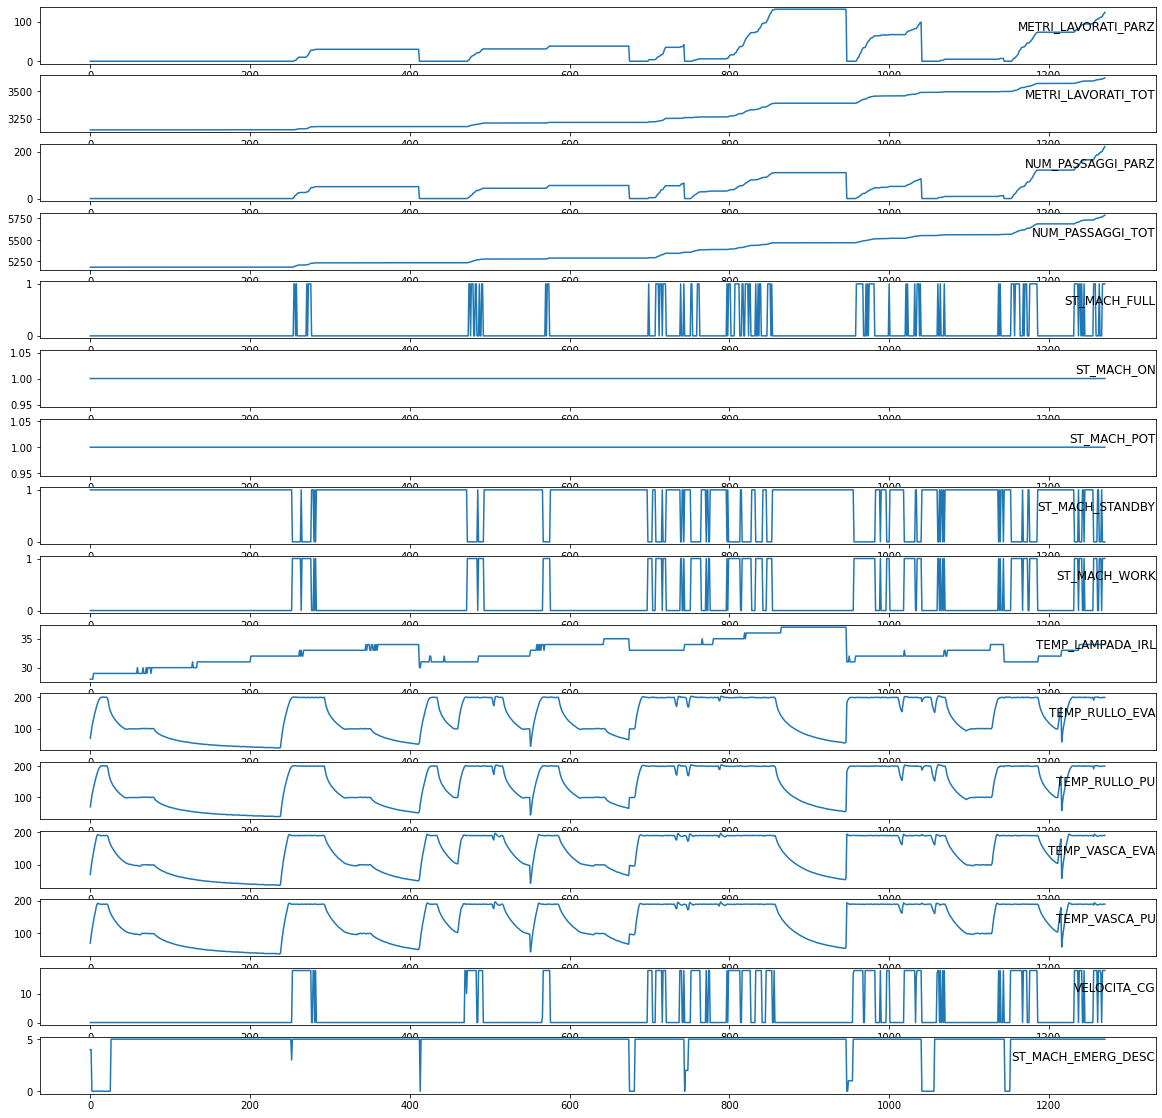

In [136]:
values = dataset.values
i = 1
pyplot.figure(figsize=(20, 20))
columns = range(len(dataset.columns))
for col in columns:
    pyplot.subplot(len(columns), 1, i)
    pyplot.plot(values[:, col])
    pyplot.title(dataset.columns[col], y=0.5, loc='right')
    i += 1
pyplot.show()
#dataset.to_csv("../../customers/arrebo/dataset_hinge.csv", index=False)

In [137]:
values = dataset.values
values = values.astype('float32')
values

array([[   0., 3148.,    0., ...,   70.,    0.,    4.],
       [   0., 3148.,    0., ...,   91.,    0.,    4.],
       [   0., 3148.,    0., ...,  109.,    0.,    0.],
       ...,
       [ 118., 3614.,  212., ...,  190.,   18.,    5.],
       [ 120., 3617.,  217., ...,  190.,   18.,    5.],
       [ 123., 3620.,  223., ...,  190.,   18.,    5.]], dtype=float32)

In [138]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled

array([[0.        , 0.        , 0.        , ..., 0.20625   , 0.        ,
        0.8       ],
       [0.        , 0.        , 0.        , ..., 0.33750004, 0.        ,
        0.8       ],
       [0.        , 0.        , 0.        , ..., 0.45000005, 0.        ,
        0.        ],
       ...,
       [0.90076333, 0.987288  , 0.9506727 , ..., 0.95625   , 1.        ,
        1.        ],
       [0.9160305 , 0.99364376, 0.9730942 , ..., 0.95625   , 1.        ,
        1.        ],
       [0.9389313 , 1.        , 1.        , ..., 0.95625   , 1.        ,
        1.        ]], dtype=float32)

In [139]:
reframed = series_to_supervised(scaled, 1,1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t)
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,1.0,0.0,0.000000,0.299401,0.299401,0.33750,0.33750,0.0,0.8
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,1.0,0.0,0.000000,0.401198,0.401198,0.45000,0.45000,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,1.0,0.0,0.000000,0.479042,0.479042,0.54375,0.54375,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,1.0,0.0,0.111111,0.550898,0.550898,0.63125,0.63125,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.111111,...,0.0,1.0,0.0,0.111111,0.622755,0.622755,0.71875,0.71875,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0.847328,0.974576,0.896861,0.962047,0.0,0.0,0.0,0.0,1.0,0.666667,...,0.0,1.0,0.0,0.666667,0.970060,0.970060,0.95000,0.95000,0.0,1.0
1267,0.847328,0.974576,0.896861,0.962047,0.0,0.0,0.0,1.0,0.0,0.666667,...,0.0,0.0,1.0,0.666667,0.964072,0.964072,0.95000,0.95000,1.0,1.0
1268,0.862595,0.978813,0.914798,0.968647,1.0,0.0,0.0,0.0,1.0,0.666667,...,0.0,0.0,1.0,0.666667,0.970060,0.970060,0.95625,0.95625,1.0,1.0
1269,0.900763,0.987288,0.950673,0.981849,1.0,0.0,0.0,0.0,1.0,0.666667,...,0.0,0.0,1.0,0.666667,0.970060,0.970060,0.95625,0.95625,1.0,1.0


In [140]:
lista = list(range(len(reframed.columns) - 16, len(reframed.columns) - 1))
reframed.drop(reframed.columns[lista], axis=1, inplace=True)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var16(t)
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.185629,0.185629,0.20625,0.20625,0.000000,0.8,0.8
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.299401,0.299401,0.33750,0.33750,0.000000,0.8,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.401198,0.401198,0.45000,0.45000,0.000000,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.479042,0.479042,0.54375,0.54375,0.000000,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.111111,0.550898,0.550898,0.63125,0.63125,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0.847328,0.974576,0.896861,0.962047,0.0,0.0,0.0,0.0,1.0,0.666667,0.964072,0.964072,0.95625,0.95625,0.944444,1.0,1.0
1267,0.847328,0.974576,0.896861,0.962047,0.0,0.0,0.0,1.0,0.0,0.666667,0.970060,0.970060,0.95000,0.95000,0.000000,1.0,1.0
1268,0.862595,0.978813,0.914798,0.968647,1.0,0.0,0.0,0.0,1.0,0.666667,0.964072,0.964072,0.95000,0.95000,1.000000,1.0,1.0
1269,0.900763,0.987288,0.950673,0.981849,1.0,0.0,0.0,0.0,1.0,0.666667,0.970060,0.970060,0.95625,0.95625,1.000000,1.0,1.0


In [141]:
values = reframed.values
n_train_hours = 1200
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1200, 1, 16) (1200,) (70, 1, 16) (70,)


Epoch 1/100
17/17 [==============================] - 3s 34ms/step - loss: 0.8408 - val_loss: 0.7491
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6194 - val_loss: 0.4056
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3249 - val_loss: 0.0530
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1184 - val_loss: 0.0576
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0776 - val_loss: 0.0455
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0635 - val_loss: 0.0172
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0614 - val_loss: 0.0177
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0557 - val_loss: 0.0157
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0509 - val_loss: 0.0114
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0474 - val_loss: 0.0089
Epoch 11

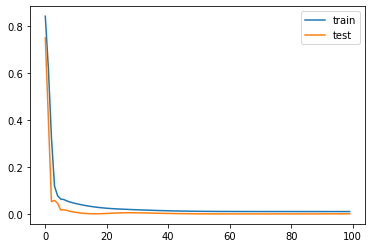

In [142]:
from keras.layers import LSTM, Dense
from keras import Sequential

# design network
model = Sequential()
model.add(LSTM(45, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dense(1))
model.add(LSTM(45, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=1,
                    shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [143]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy import concatenate

yhat = model.predict(test_X)
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X_reshaped[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]
# invert scaling for actual
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y_reshaped, test_X_reshaped[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

3/3 [==============================] - 0s 0s/step
Test RMSE: 3.262
